## Homework 4: Data Visualization
Name: Siddharth Gavhane

UB Username: gavhane

UB Person Number: 50546237

Part 1 - Generate Plots According to Specifications

# Problem 1 - Scatter Plot with a Line

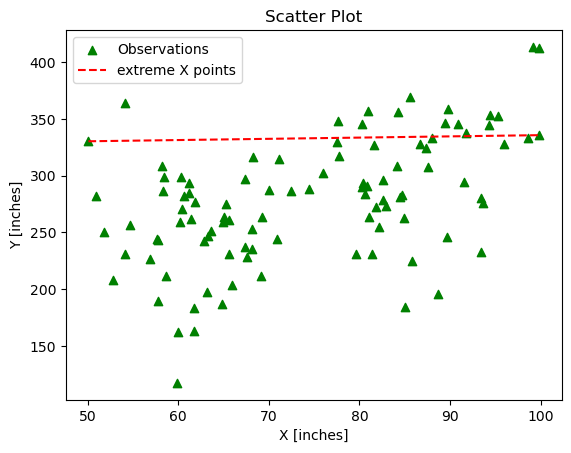

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/siddharth/Desktop/UB/Programming for analytics/PFA/scatter_data.csv")

plt.scatter(df['% x'], df[' y '], color='green', marker='^', label='Observations')

sorted_df = df.sort_values(by ='% x')
plt.plot([sorted_df['% x'].iloc[0], sorted_df['% x'].iloc[-1]],
         [sorted_df[' y '].iloc[0], sorted_df[' y '].iloc[-1]],
         color='red', linestyle='--', label='extreme X points')

plt.title('Scatter Plot')

plt.xlabel('X [inches]')
plt.ylabel('Y [inches]')

plt.legend()
plt.show()

# Problem 2 - Histogram

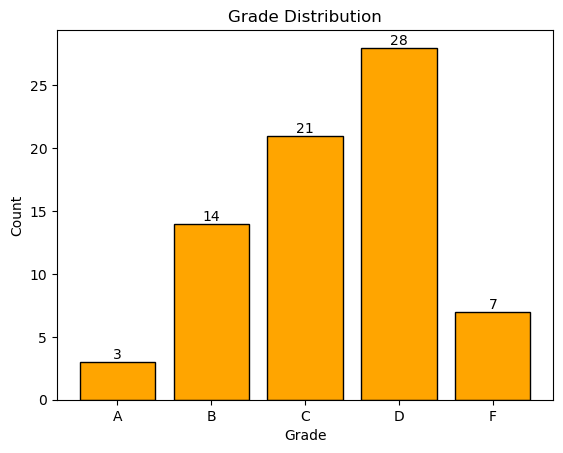

In [6]:
df1 = pd.read_csv("/Users/siddharth/Desktop/UB/Programming for analytics/PFA/student_grades.csv")
df1
df1.columns = df1.columns.str.strip()
score = [(90, 100), (80, 90), (70, 80), (60, 70), (0, 60)]
label = ['A', 'B', 'C', 'D', 'F']
df1['grade_category'] = pd.cut(df1['avgScore'],
                                       bins=[0, 60, 70, 80, 90, 101],
                                       labels=label,
                                       right=False) 
grades = df1['grade_category'].value_counts().reindex(label, fill_value=0)
plt.bar(label, grades, color='orange', edgecolor='black')
for label, count in zip(label, grades):
    plt.text(label, count, str(count), ha='center', va='bottom')

plt.title("Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

# Problem 3 - Barplot and Boxplot in the Same Figure


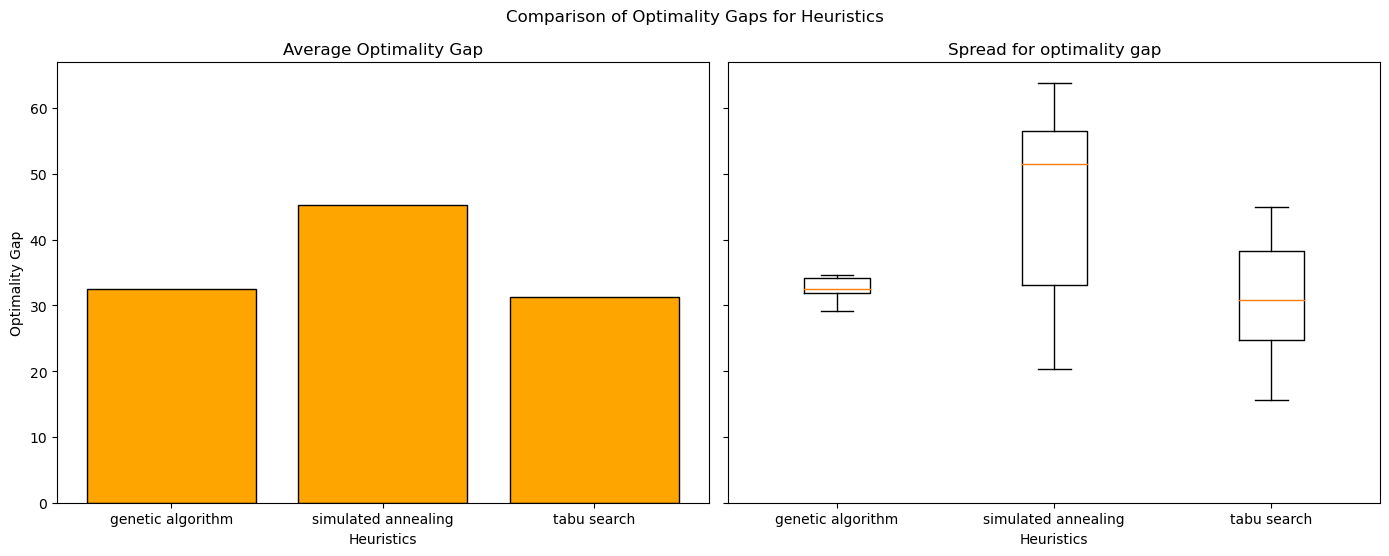

In [3]:
df2 = pd.read_csv("/Users/siddharth/Desktop/UB/Programming for analytics/PFA/solution_data.csv")
df2.columns = df2.columns.str.strip()
optimal = df2[df2["SolnMethod"] == "optimal"]
merge = df2.merge(optimal, on = '% Problem', suffixes = ('', 'optimal'))
merge['optimality_gap'] = ((merge['Valueoptimal'] - merge['Value'])/merge['Valueoptimal'])*100
heuristic = merge[merge['SolnMethod'] != 'optimal']
average = heuristic.groupby('SolnMethod')['optimality_gap'].mean().reset_index()
boxplot = heuristic.groupby('SolnMethod')['optimality_gap'].apply(list).reset_index(name='optimality_gap')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey = True)
fig.suptitle('Comparison of Optimality Gaps for Heuristics')

ax1.bar(average['SolnMethod'], average['optimality_gap'], color = 'orange', edgecolor = 'black')
ax1.set(title = 'Average Optimality Gap', xlabel = 'Heuristics', ylabel = 'Optimality Gap')

boxplot_data = [row['optimality_gap'] for index, row in boxplot.iterrows()]
ax2.boxplot(boxplot_data)
ax2.set(title = 'Spread for optimality gap', xlabel = 'Heuristics', xticklabels = boxplot['SolnMethod'])

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.show()

# Part 2 - Explore New Plot Types

This pie chart presents data on the distribution of players across different continents. It's an effective tool for straightforward visual analysis. From this chart, it's readily apparent that Europe contributes 47.3% of the players, while Asia accounts for 39.9%.

URL of Example Code: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

URL of Sample Data: https://www.kaggle.com/datasets/dhavalrupapara/cricket-players-worldwide-dataset

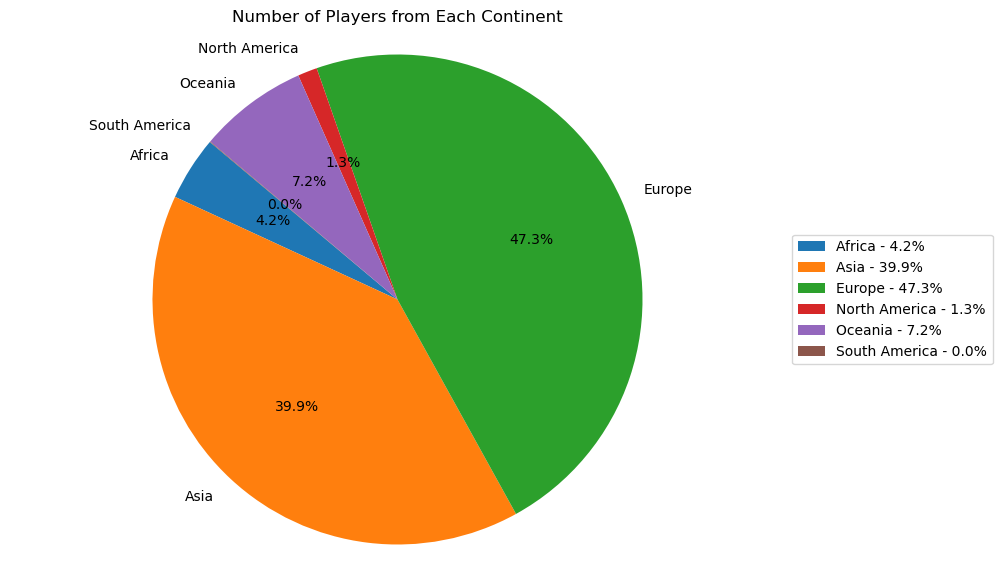

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
 
data = pd.read_csv("/Users/siddharth/Desktop/UB/Programming for analytics/PFA/players_data_with_all_info.csv")

player_counts_by_continent = data.groupby('continent_name')['id'].nunique()

plt.figure(figsize=(10, 7))
patches, texts, autotexts = plt.pie(player_counts_by_continent, labels=player_counts_by_continent.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Players from Each Continent')
plt.axis('equal')

legend_labels = ['{0} - {1:1.1f}%'.format(i,j) for i,j in zip(player_counts_by_continent.index, player_counts_by_continent.values/player_counts_by_continent.sum()*100)]

plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
